In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from aging.plotting import format_plots, save_factory, figure, legend, PlotConfig, add_identity

In [2]:
colors = ['#c7eae5','#008C8D']
male_cmap = sns.blend_palette(colors, as_cmap=True)
colors = ['#fee6ce','#d94801']
female_cmap = sns.blend_palette(colors, as_cmap=True)

In [3]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet')
f_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet')
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]
f_df = f_df[keep_syllables]
df = df.set_index(pd.Index(['male'] * len(df), name='experiment'), append=True)
f_df = f_df.set_index(pd.Index(['female'] * len(f_df), name='experiment'), append=True)
df = pd.concat([df, f_df])

usage_order = df.quantile(0.9).sort_values(ascending=False).index
df = df[usage_order].astype('float32')
df = df.query('age < 100')

In [4]:
cmapmap = {
    'male': male_cmap,
    'female': female_cmap,
}

In [5]:
def minmax(df):
    return (df - df.min()) / (df.max() - df.min())
    
def age_minmax(df):
    avg = df.groupby('age').mean()
    
    return (df - avg.min()) / (avg.max() - avg.min())

In [6]:
pca = PCA(n_components=3)
scores = pca.fit_transform(df)
scores_df = pd.DataFrame(scores, index=df.index)

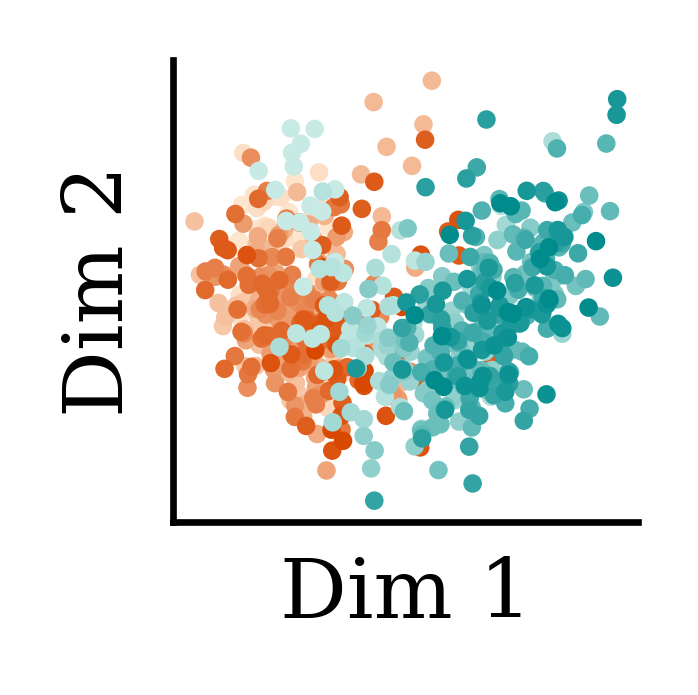

In [7]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

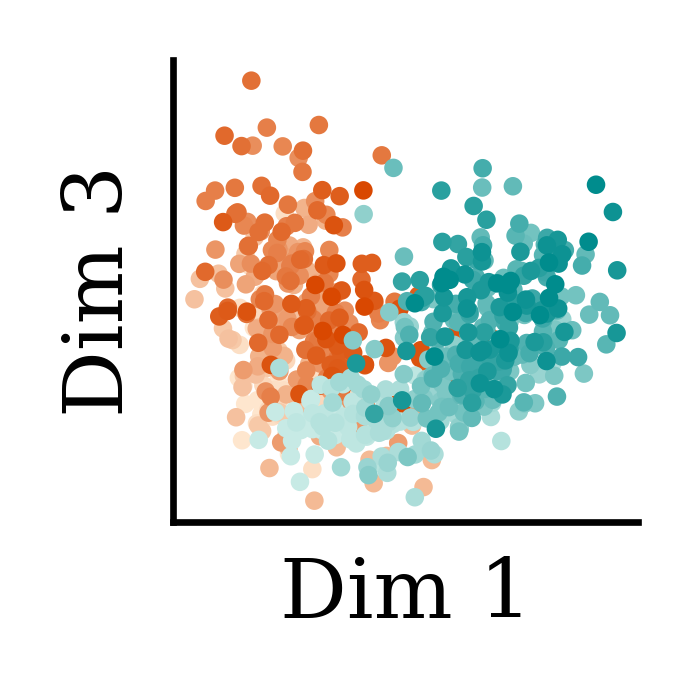

In [8]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 3")
sns.despine()

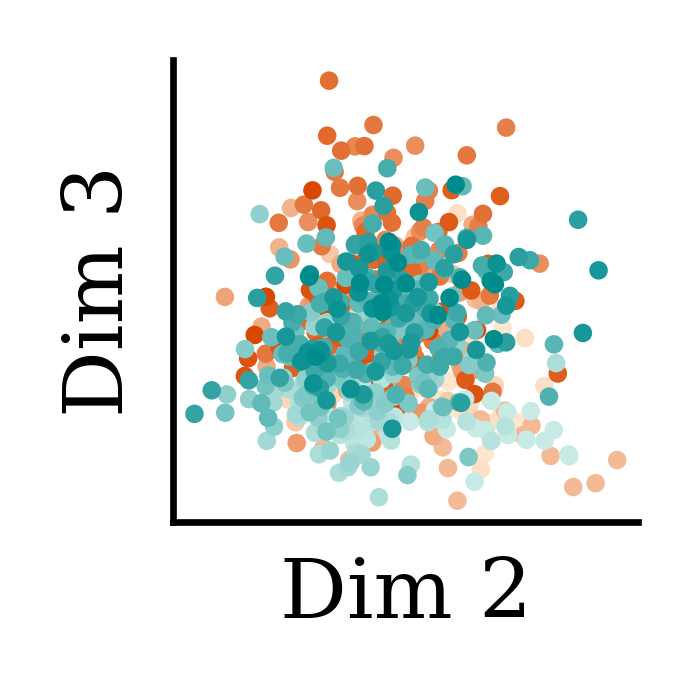

In [9]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[1], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 2", ylabel="Dim 3")
sns.despine()

In [10]:
sex_scores_df = scores_df.reset_index().set_index('experiment')

In [11]:
male_df = sex_scores_df.loc['male']
female_df = sex_scores_df.loc['female']

In [12]:
pca = PCA(n_components=3)
scores = pca.fit_transform(df.groupby('experiment').transform(age_minmax))
scores_df = pd.DataFrame(scores, index=df.index)

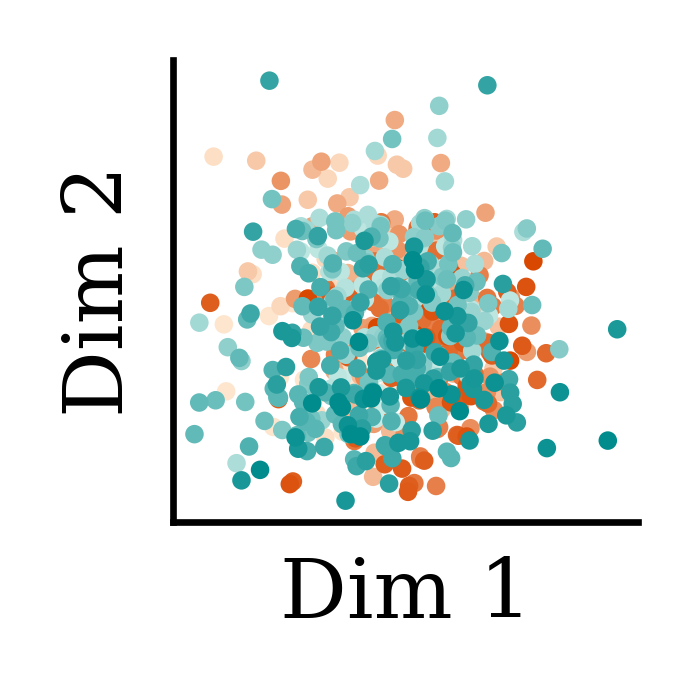

In [13]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

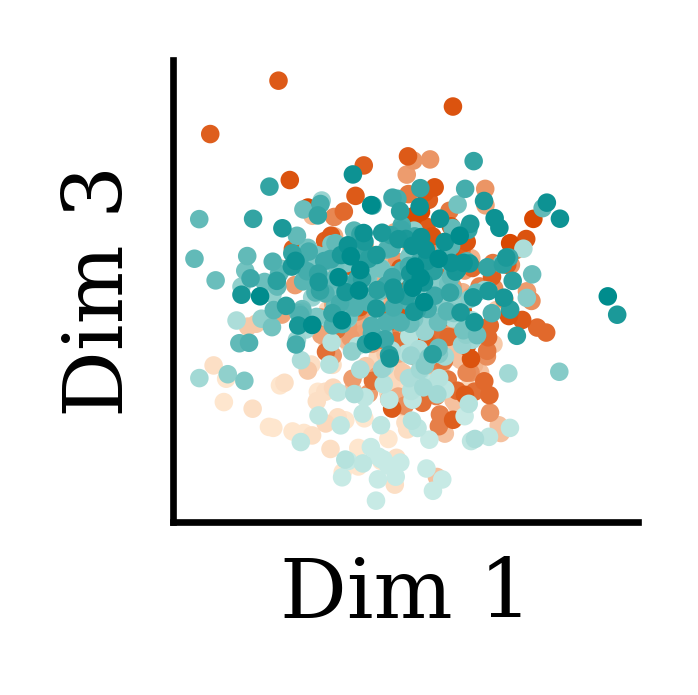

In [14]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 3")
sns.despine()

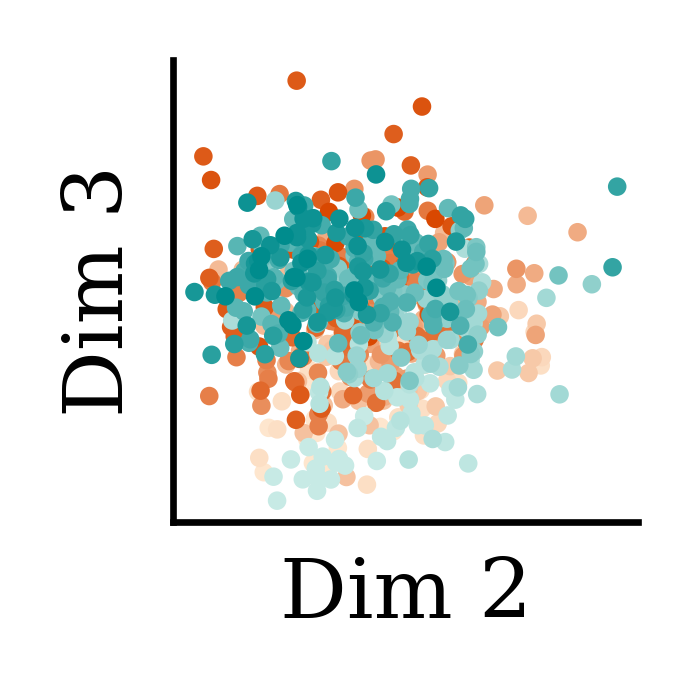

In [15]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[1], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 2", ylabel="Dim 3")
sns.despine()

In [16]:
pca = PCA(n_components=3)
scores = pca.fit_transform(df.groupby('experiment').transform(minmax))
scores_df = pd.DataFrame(scores, index=df.index)

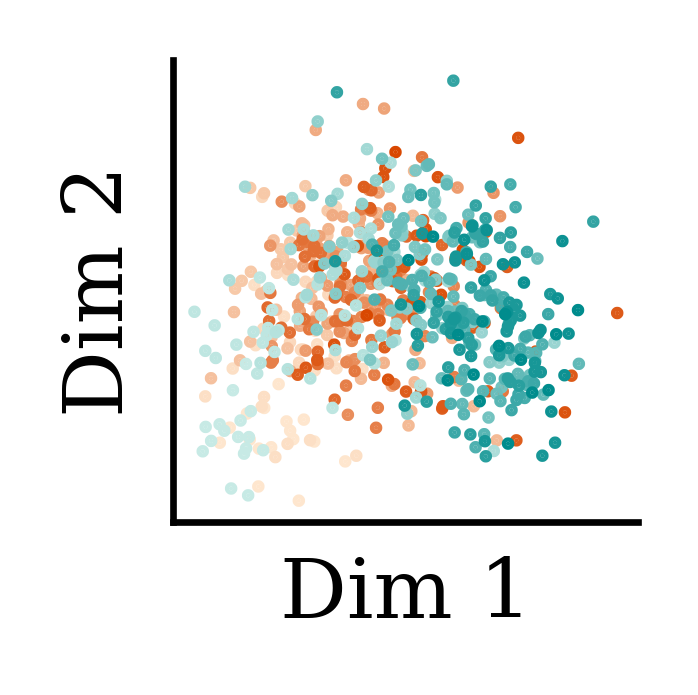

In [17]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=0.25)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

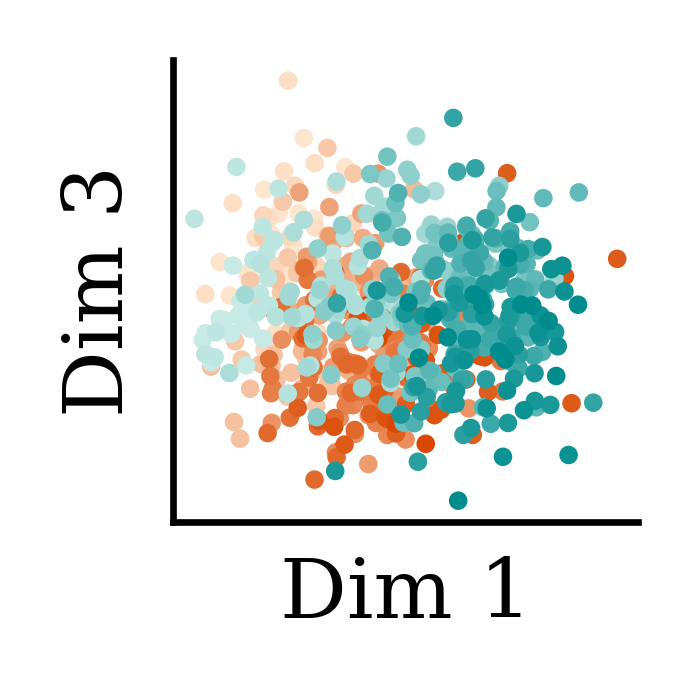

In [18]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 3")
sns.despine()

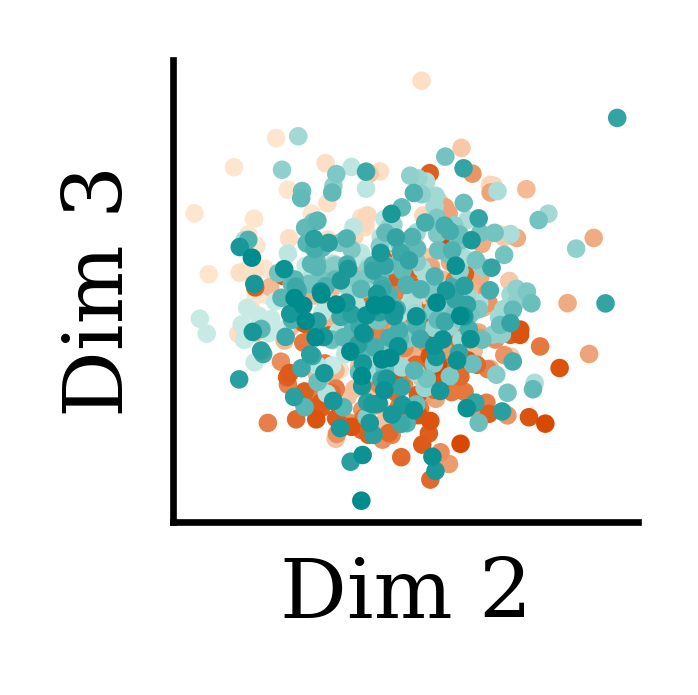

In [19]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[1], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 2", ylabel="Dim 3")
sns.despine()

## Version 12

In [49]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_males_raw_usage_matrix_v00.parquet')
f_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_females_raw_usage_matrix_v00.parquet')
# keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/to_keep_syllables_raw.txt', dtype=int)

In [50]:
keep_syllables = df.groupby('age').mean().quantile(0.9) > 0.005
keep_syllables = keep_syllables | (df.groupby('age').mean().std() > 0.001)

In [51]:
keep_syllables = keep_syllables[keep_syllables].index

In [52]:
df = df[keep_syllables]
f_df = f_df[keep_syllables]
df = df.set_index(pd.Index(['male'] * len(df), name='experiment'), append=True)
f_df = f_df.set_index(pd.Index(['female'] * len(f_df), name='experiment'), append=True)
df = pd.concat([df, f_df])

usage_order = df.quantile(0.9).sort_values(ascending=False).index
df = df[usage_order].astype('float32')
df = df.query('age < 100')

In [53]:
df

syllables                                                                                                          46  \
age mouse     subject_name session_name uuid                                 date                experiment             
4   4M_01_01  4M_01_01     otgy_4M_01   e6ad4e15-0ce1-4833-a751-09aa15bfa2e5 2023-12-01 10:54:30 male        0.160181   
    4M_01_02  4M_01_02     otgy_4M_01   2bb5e7fa-02cd-4694-accf-fed9651b1beb 2023-12-01 08:00:22 male        0.147198   
    4M_01_03  4M_01_03     otgy_4M_01   7daed982-62e5-4695-971f-c229381d7521 2023-12-01 11:04:03 male        0.137931   
    4M_01_04  4M_01_04     otgy_4M_01   43e12fcc-2119-4e15-b11c-add440ca5f74 2023-12-01 07:51:47 male        0.135044   
    4M_02_01  4M_02_01     otgy_4M_02   6568fdb5-82b5-4241-8ccb-572ae49bd87a 2023-12-01 12:53:09 male        0.158055   
...                                                                                                               ...   
90  90F_01_04 90F_01_04    otgy_90F_01  ffc82238-45c2-452a-895a-c35f174e337b 2023-10-30 09:04:37 female      0.189427   
    90F_02_01 90F_02_01    otgy_90F_02  108566e7-1e7e-4847-8917-2f5c130e582c 2023-10-30 14:00:09 female      0.136476   
    90F_02_02 90F_02_02    otgy_90F_02  4ee0f9b5-677a-47ec-a511-bac82119c899 2023-10-30 11:00:28 female      0.153391   
    90F_02_03 90F_02_03    otgy_90F_02  31962062-3725-4196-89af-51e8c93ada61 2023-10-30 11:00:50 female      0.094842   
    90F_02_04 90F_02_04    otgy_90F_02  f3556a79-f674-4eb5-ae4f-6c8576c0bb9b 2023-10-30 11:01:07 female      0.197549   

syllables                                                                                                          97  \
age mouse     subject_name session_name uuid                                 date                experiment             
4   4M_01_01  4M_01_01     otgy_4M_01   e6ad4e15-0ce1-4833-a751-09aa15bfa2e5 2023-12-01 10:54:30 male        0.078281   
    4M_01_02  4M_01_02     otgy_4M_01   2bb5e7fa-02cd-4694-accf-fed9651b1beb 2023-12-01 08:00:22 male        0.095916   
    4M_01_03  4M_01_03     otgy_4M_01   7daed982-62e5-4695-971f-c229381d7521 2023-12-01 11:04:03 male        0.137416   
    4M_01_04  4M_01_04     otgy_4M_01   43e12fcc-2119-4e15-b11c-add440ca5f74 2023-12-01 07:51:47 male        0.102633   
    4M_02_01  4M_02_01     otgy_4M_02   6568fdb5-82b5-4241-8ccb-572ae49bd87a 2023-12-01 12:53:09 male        0.110436   
...                                                                                                               ...   
90  90F_01_04 90F_01_04    otgy_90F_01  ffc82238-45c2-452a-895a-c35f174e337b 2023-10-30 09:04:37 female      0.055800   
    90F_02_01 90F_02_01    otgy_90F_02  108566e7-1e7e-4847-8917-2f5c130e582c 2023-10-30 14:00:09 female      0.083375   
    90F_02_02 90F_02_02    otgy_90F_02  4ee0f9b5-677a-47ec-a511-bac82119c899 2023-10-30 11:00:28 female      0.038213   
    90F_02_03 90F_02_03    otgy_90F_02  31962062-3725-4196-89af-51e8c93ada61 2023-10-30 11:00:50 female      0.109817   
    90F_02_04 90F_02_04    otgy_90F_02  f3556a79-f674-4eb5-ae4f-6c8576c0bb9b 2023-10-30 11:01:07 female      0.055882   

syllables                                                                                                          13  \
age mouse     subject_name session_name uuid                                 date                experiment             
4   4M_01_01  4M_01_01     otgy_4M_01   e6ad4e15-0ce1-4833-a751-09aa15bfa2e5 2023-12-01 10:54:30 male        0.082805   
    4M_01_02  4M_01_02     otgy_4M_01   2bb5e7fa-02cd-4694-accf-fed9651b1beb 2023-12-01 08:00:22 male        0.090218   
    4M_01_03  4M_01_03     otgy_4M_01   7daed982-62e5-4695-971f-c229381d7521 2023-12-01 11:04:03 male        0.086464   
    4M_01_04  4M_01_04     otgy_4M_01   43e12fcc-2119-4e15-b11c-add440ca5f74 2023-12-01 07:51:47 male        0.083052   
    4M_02_01  4M_02_01     otgy_4M_02   6568fdb5-82b5-4241-8ccb-572ae49bd87a 2023-12-01 12:53:09 male        0.082573   
...  

In [54]:
pca = PCA(n_components=3)
scores = pca.fit_transform(df)
scores_df = pd.DataFrame(scores, index=df.index)

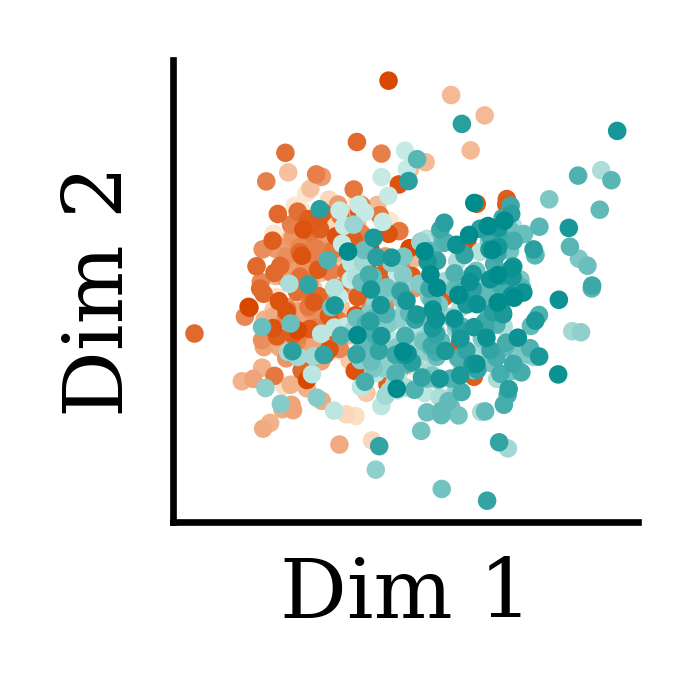

In [55]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

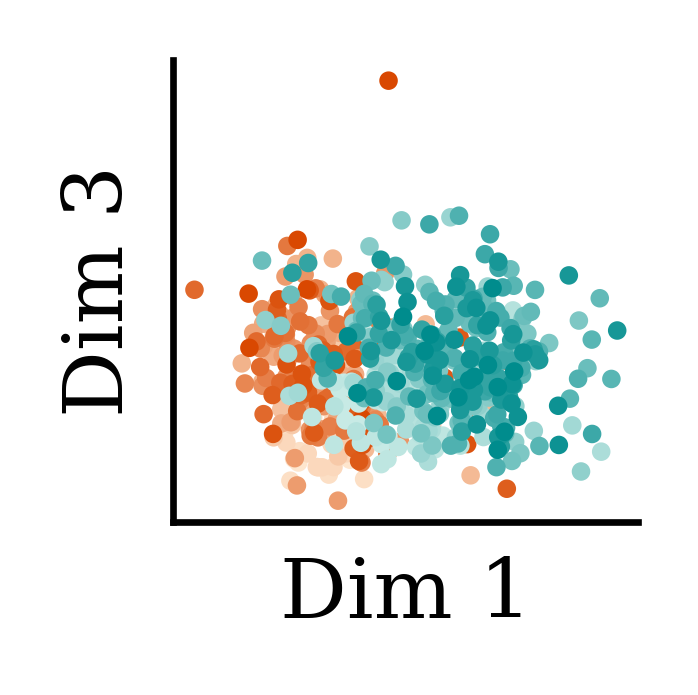

In [56]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 3")
sns.despine()

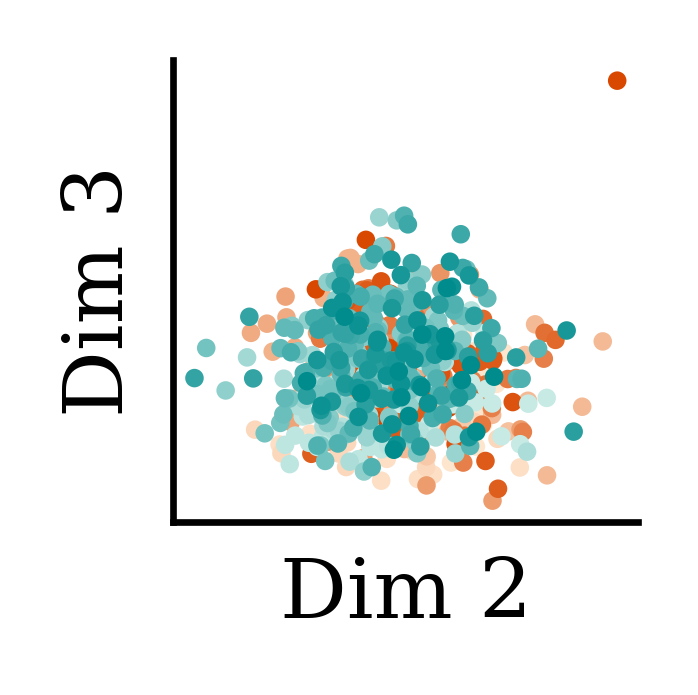

In [57]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[1], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 2", ylabel="Dim 3")
sns.despine()

In [58]:
sex_scores_df = scores_df.reset_index().set_index('experiment')

In [59]:
male_df = sex_scores_df.loc['male']
female_df = sex_scores_df.loc['female']

In [60]:
pca = PCA(n_components=3)
scores = pca.fit_transform(df.groupby('experiment').transform(age_minmax))
scores_df = pd.DataFrame(scores, index=df.index)

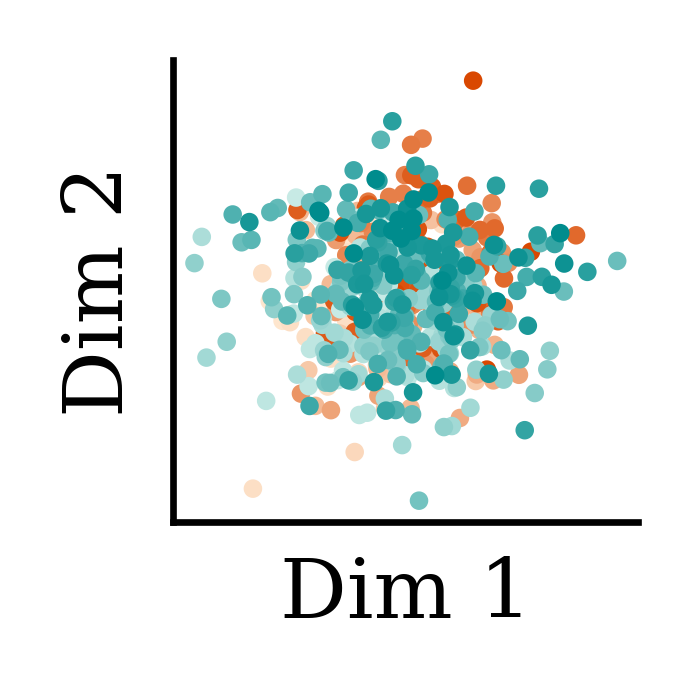

In [61]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

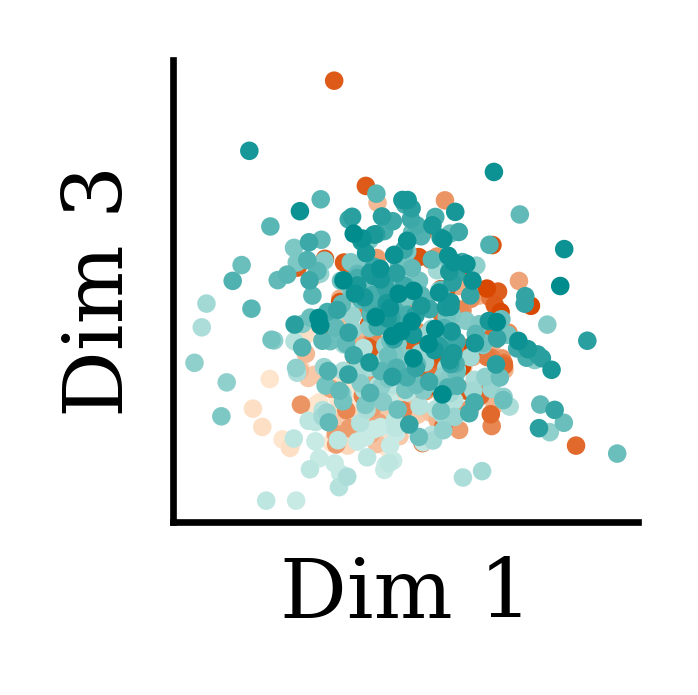

In [62]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 3")
sns.despine()

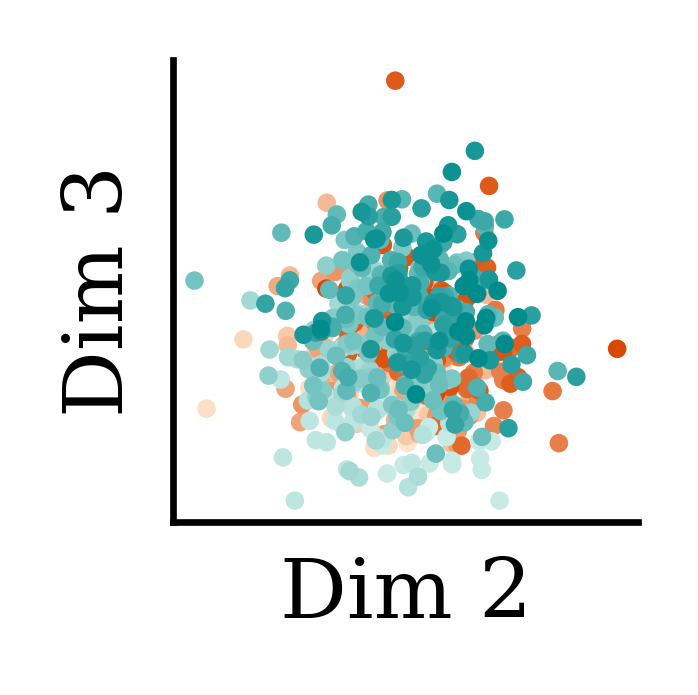

In [63]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[1], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 2", ylabel="Dim 3")
sns.despine()

In [64]:
pca = PCA(n_components=3)
scores = pca.fit_transform(df.groupby('experiment').transform(minmax))
scores_df = pd.DataFrame(scores, index=df.index)

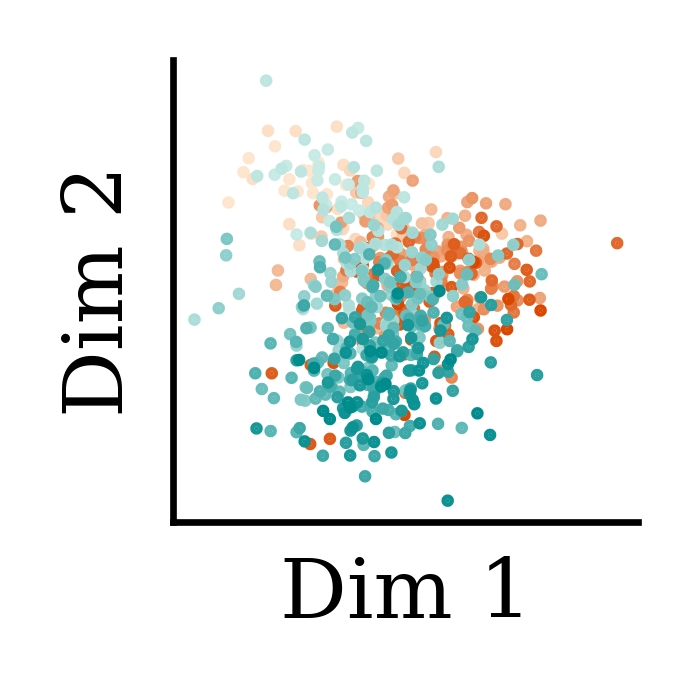

In [65]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[1], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=0.25)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

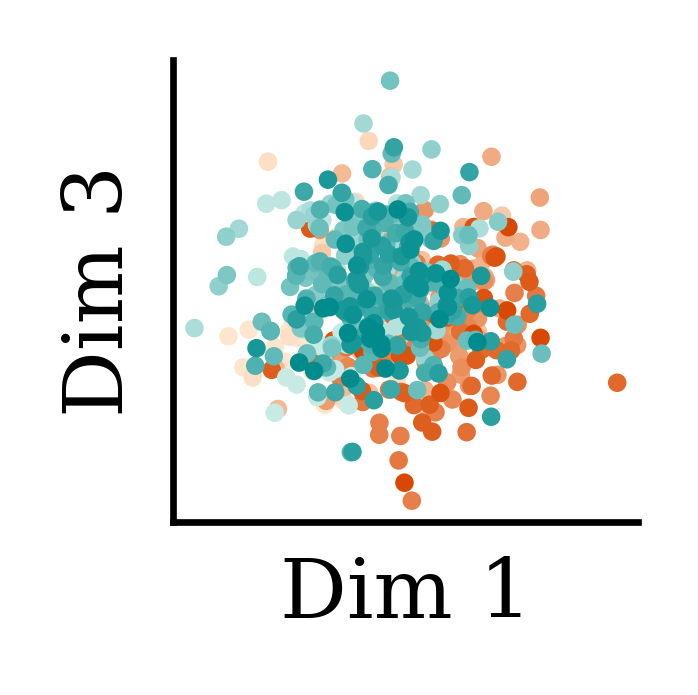

In [66]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[0], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 3")
sns.despine()

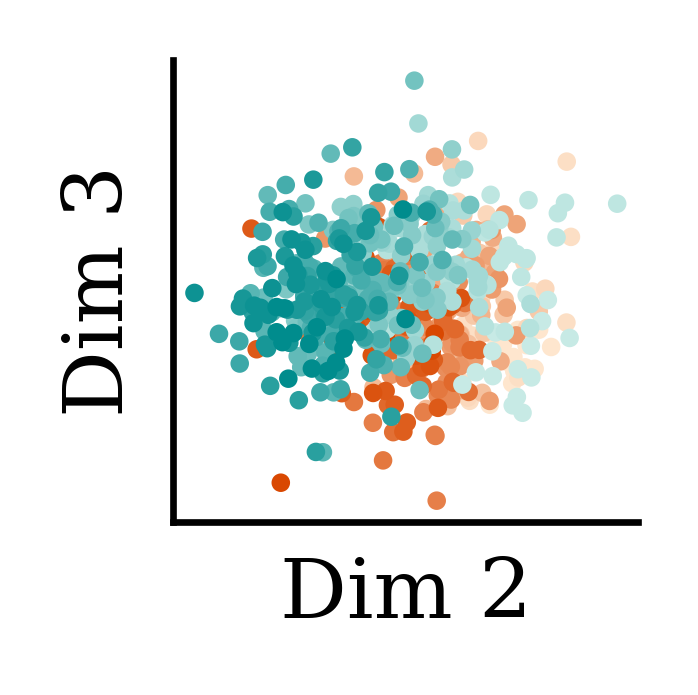

In [67]:
fig = figure(1, 1)
ax = fig.gca()
for experiment, _df in scores_df.groupby('experiment'):
    ax.scatter(_df[1], _df[2], c=_df.index.get_level_values('age'), cmap=cmapmap[experiment], s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 2", ylabel="Dim 3")
sns.despine()